In [1]:
# Importar bibliotecas necesarias
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Supongamos que estos son los valores reales y las predicciones del modelo para 3 clases
y_true = np.array([0, 1, 2, 2, 1, 0, 1, 2, 0, 0])  # Valores reales
y_pred = np.array([0, 2, 1, 2, 1, 0, 0, 2, 0, 1])  # Predicciones del modelo
n_classes = 3

In [3]:
print("valores reales", y_true)
# Binarizar las etiquetas para ROC AUC
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
print("binarizado ", y_true_bin)

valores reales [0 1 2 2 1 0 1 2 0 0]
binarizado  [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]]


In [4]:
y_pred_prob = np.array([[0.9, 0.05, 0.05],  # Probabilidades para cada clase (ejemplo)
                        [0.1, 0.2, 0.7],
                        [0.2, 0.6, 0.2],
                        [0.05, 0.2, 0.75],
                        [0.1, 0.8, 0.1],
                        [0.7, 0.2, 0.1],
                        [0.5, 0.4, 0.1],
                        [0.1, 0.3, 0.6],
                        [0.8, 0.1, 0.1],
                        [0.4, 0.5, 0.1]])

In [5]:
# Calcular Precision, Recall, F1-Score y Accuracy para el problema multiclase
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

In [6]:
# Calcular AUC (Area Under the Curve) para cada clase
auc = roc_auc_score(y_true_bin, y_pred_prob, multi_class="ovr")

In [7]:
# Mostrar las métricas
print(f'Precisión (Macro): {precision_macro:.2f}')
print(f'Recall (Macro): {recall_macro:.2f}')
print(f'F1-Score (Macro): {f1_macro:.2f}')
print(f'Exactitud (Accuracy): {accuracy:.2f}')
print(f'AUC (OvR): {auc:.2f}')

Precisión (Macro): 0.58
Recall (Macro): 0.58
F1-Score (Macro): 0.58
Exactitud (Accuracy): 0.60
AUC (OvR): 0.86


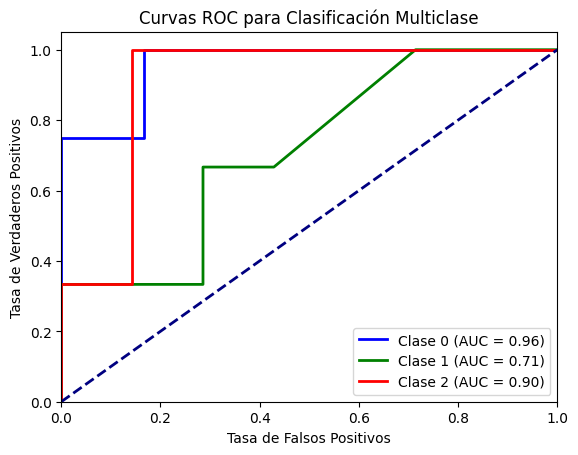

In [8]:
# Calcular ROC curve para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_pred_prob[:, i])

# Graficar las curvas ROC para cada clase
plt.figure()
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para Clasificación Multiclase')
plt.legend(loc="lower right")
plt.show()
